Imports

In [ ]:
import math
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


Info data:

- Number of Instances: 41188 for bank-additional-full.csv

- Number of Attributes: 20 + output attribute.

- Attribute information:

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

- Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


In [38]:
# load data
Data_bank_full = pd.read_csv('C:/Users/JennyPoelen(Companen/Pythonscripts/bank-additional-full.csv', sep=';')

In [39]:
Data_bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [40]:
# drop duration
Data_bank_full = Data_bank_full.drop("duration", axis='columns')

In [41]:
Data_bank_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [42]:
Data_bank_full.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [43]:
print("categorical: ")
categorical_vars=Data_bank_full.describe(include=[object]).columns
print(categorical_vars)


print("Continuous: ")
continous_vars=Data_bank_full.describe().columns  #get the names of numerical variables, in this case continuous variables
print(continous_vars)



categorical: 
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')
Continuous: 
Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [44]:
unknown_counts = (Data_bank_full == "unknown").sum().to_frame(name="Aantal_unknown")
unknown_counts


,Aantal_unknown
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


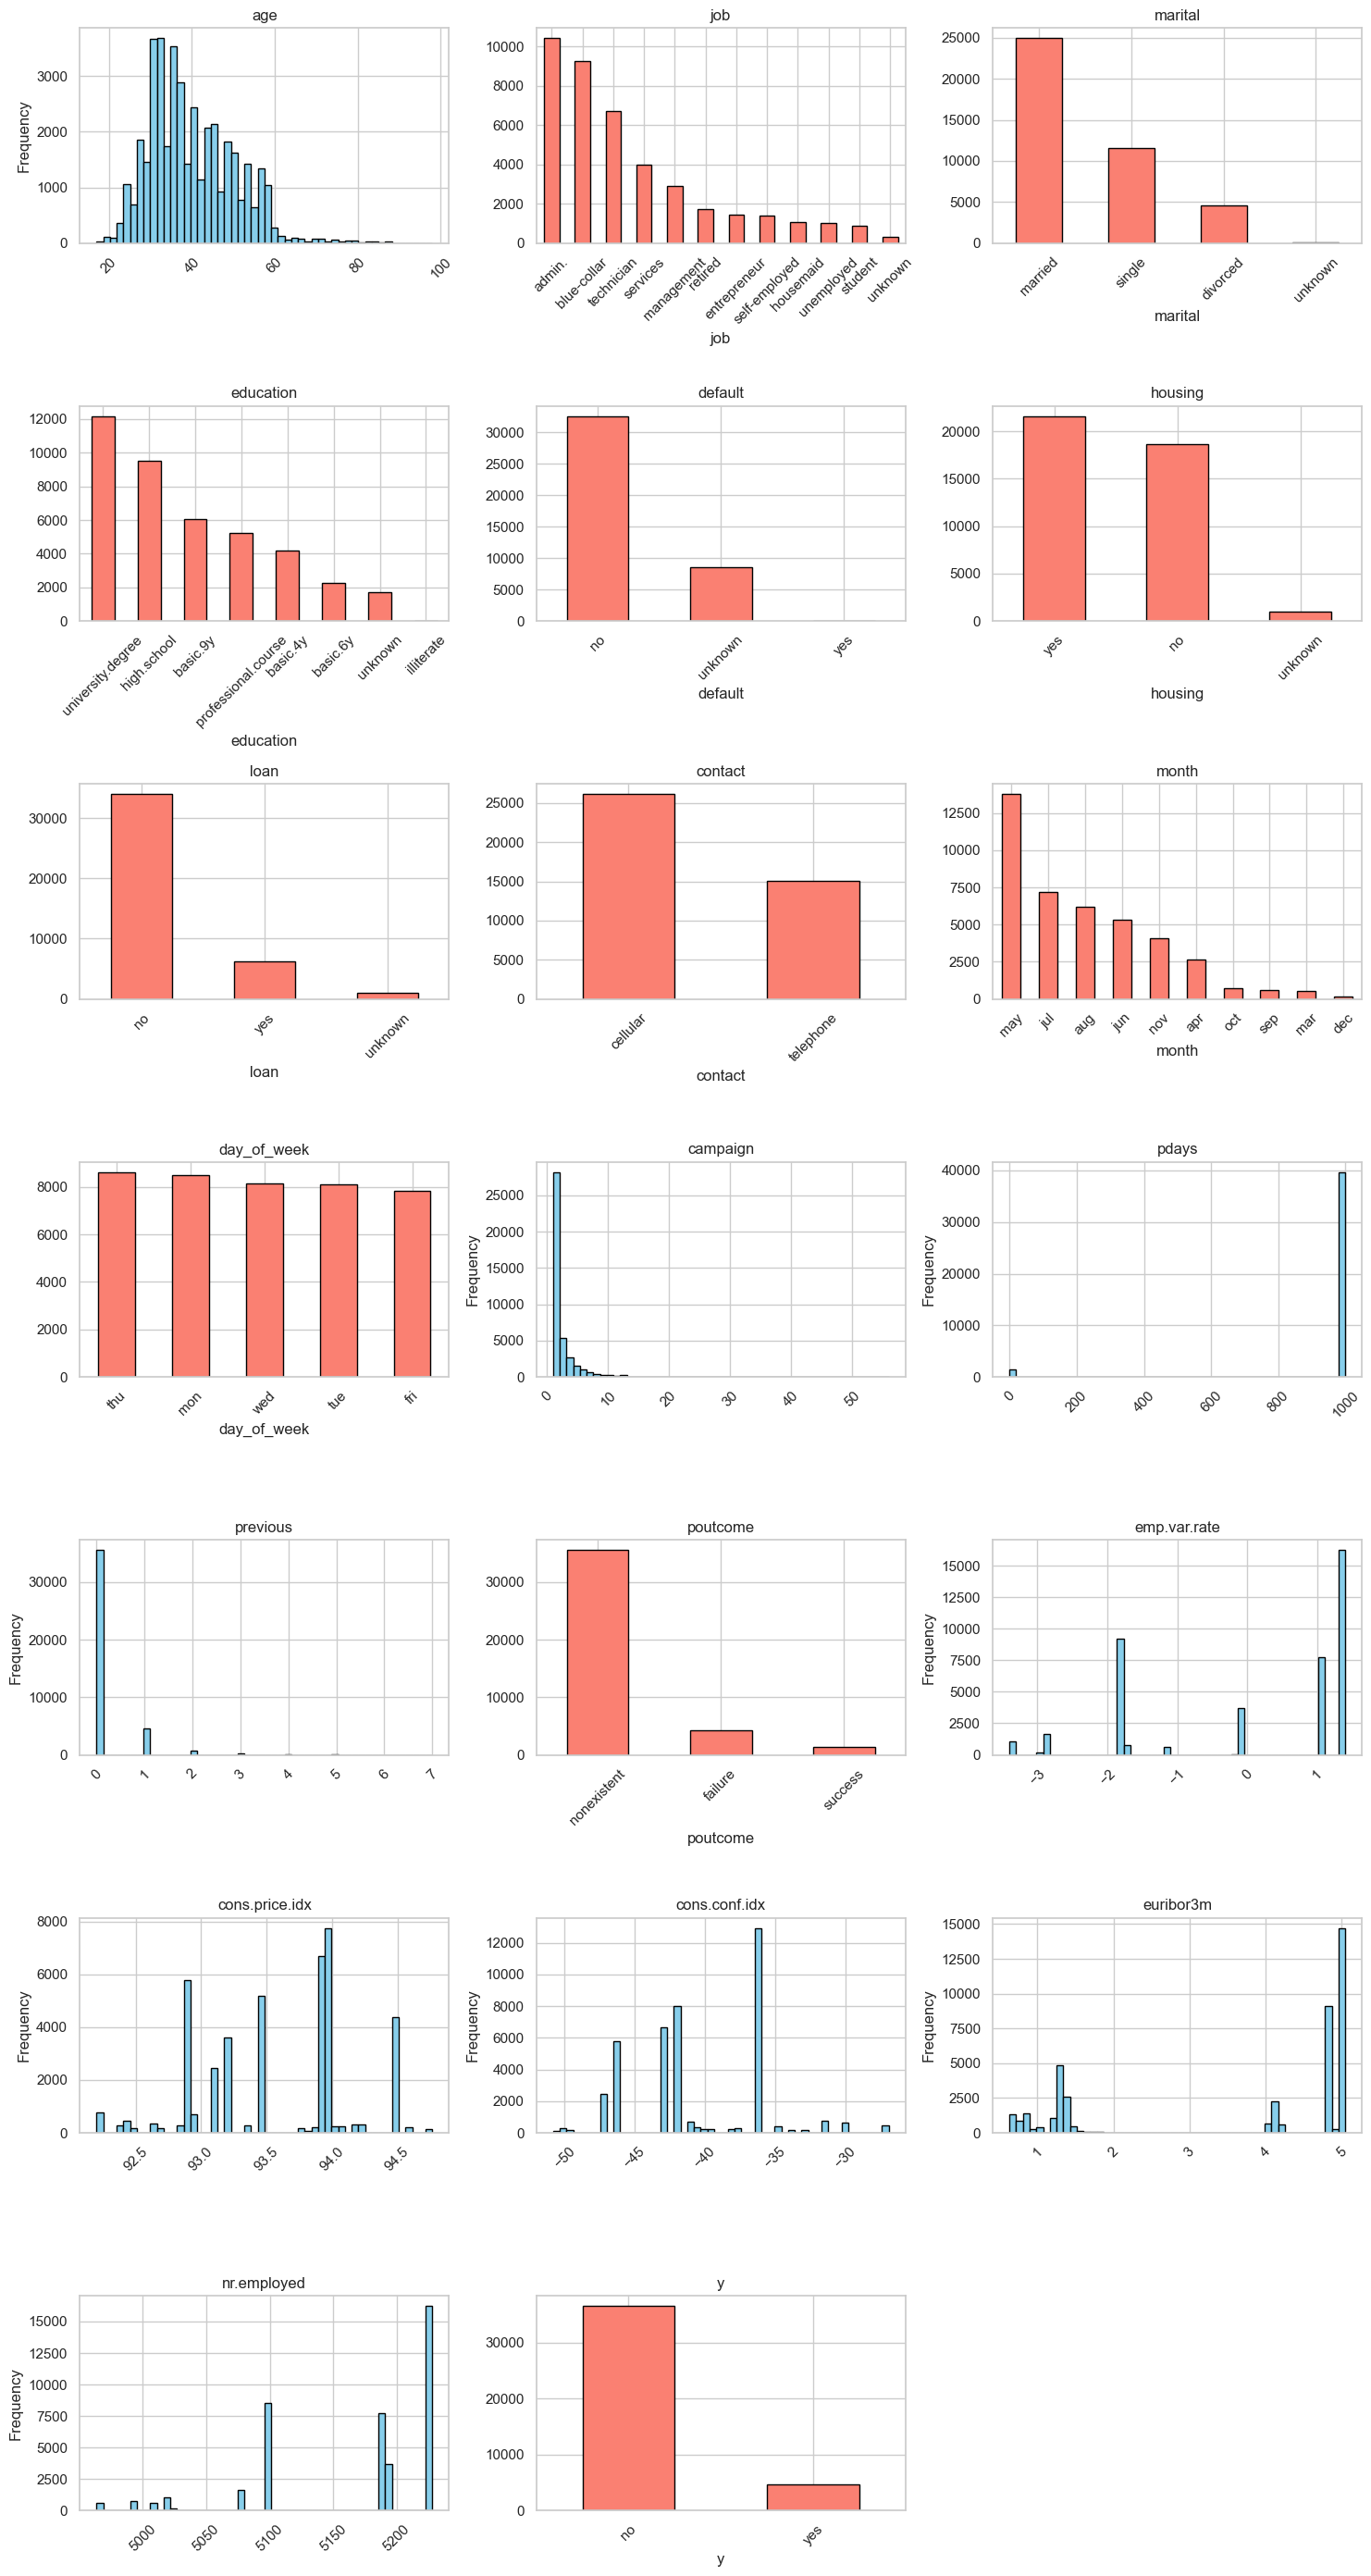

In [45]:
# Optional: use seaborn style for nicer aesthetics
sns.set(style="whitegrid")  

# Identify numeric columns
num_cols = Data_bank_full.select_dtypes(include='number').columns.tolist()

# All columns
all_cols = list(Data_bank_full.columns)
n = len(all_cols)

# Subplot layout
cols = 3
rows = math.ceil(n / cols)

# Create figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(all_cols):
    ax = axes[i]
    
    if col in num_cols:
        # Histogram for numeric columns
        Data_bank_full[col].plot.hist(
            bins=50, 
            edgecolor='black',  # fine lines around bars
            color='skyblue',
            ax=ax
        )
    else:
        # Bar plot for categorical columns
        Data_bank_full[col].value_counts().sort_values(ascending=False).plot(
            kind='bar',
            edgecolor='black',  # fine lines around bars
            color='salmon',
            ax=ax
        )
    
    ax.set_title(col, fontsize=12)
    ax.tick_params(axis='x', rotation=45)  # rotate x labels for readability

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



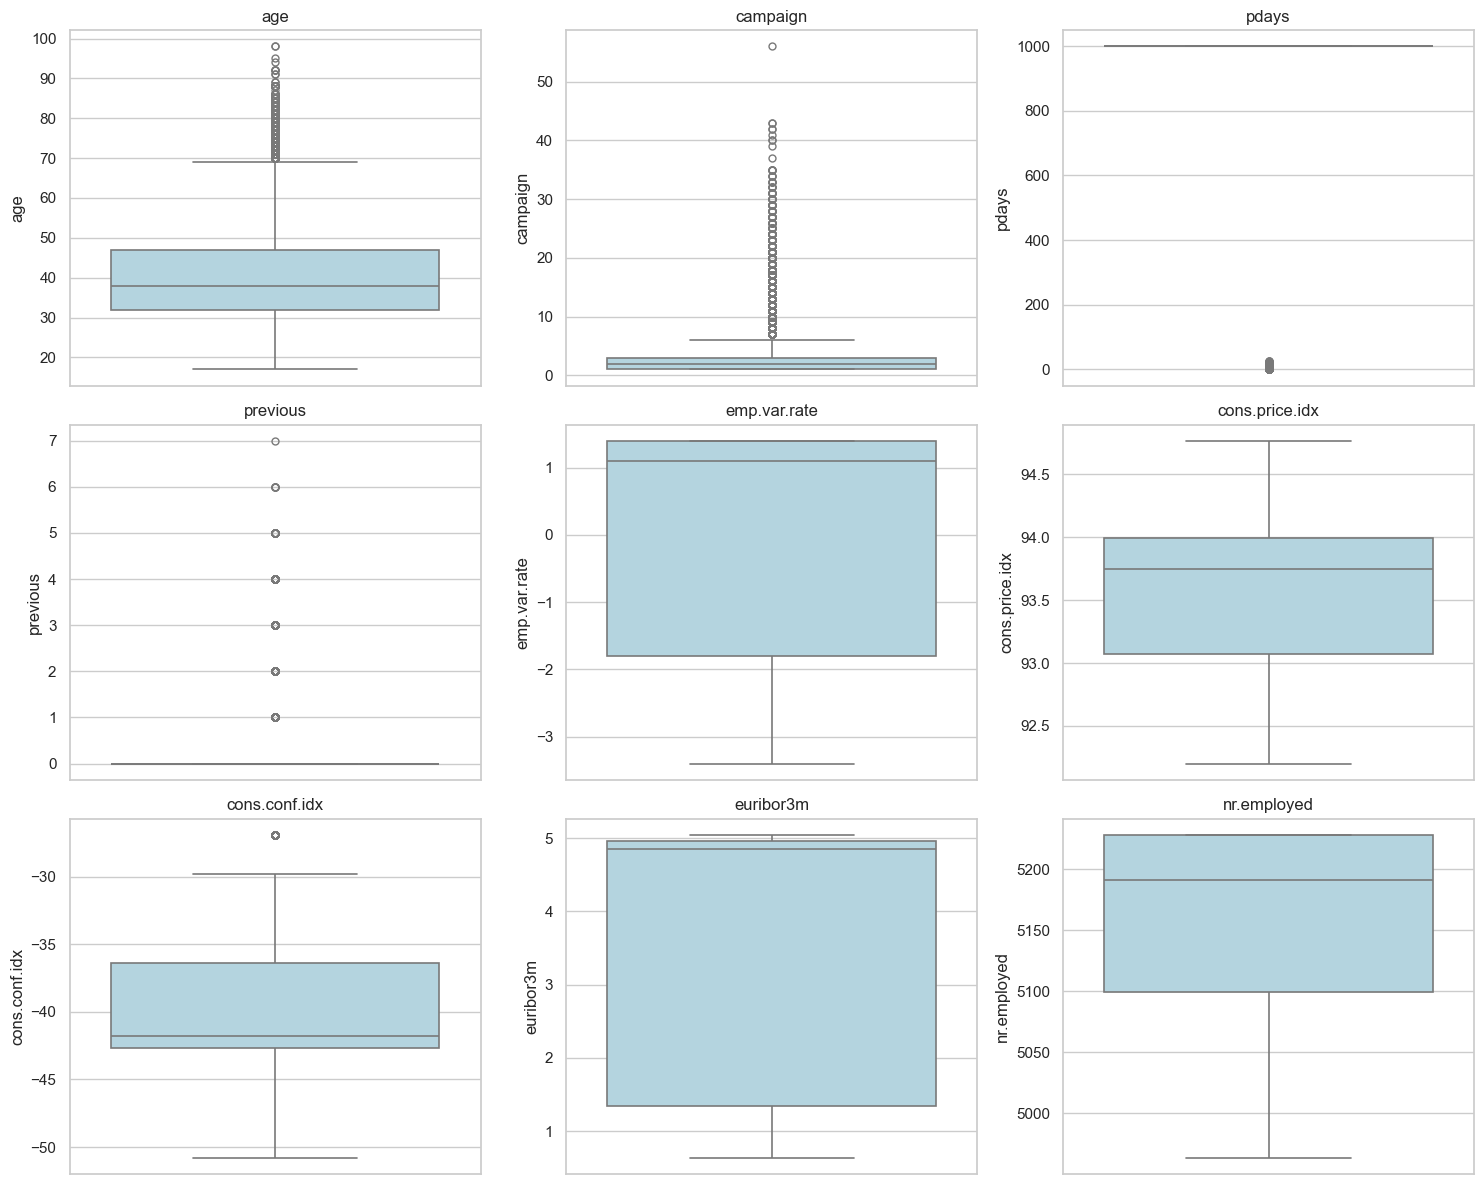

In [46]:
sns.set(style="whitegrid")  # clean background with grid

# Numeric columns only
num_cols = Data_bank_full.select_dtypes(include='number').columns.tolist()
n = len(num_cols)

# Subplot layout
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    ax = axes[i]
    
    sns.boxplot(
        y=Data_bank_full[col],
        ax=ax,
        color='lightblue',
        fliersize=5,       # size of outlier points
        linewidth=1.2      # thickness of box and lines
    )
    
    ax.set_title(col, fontsize=12)

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


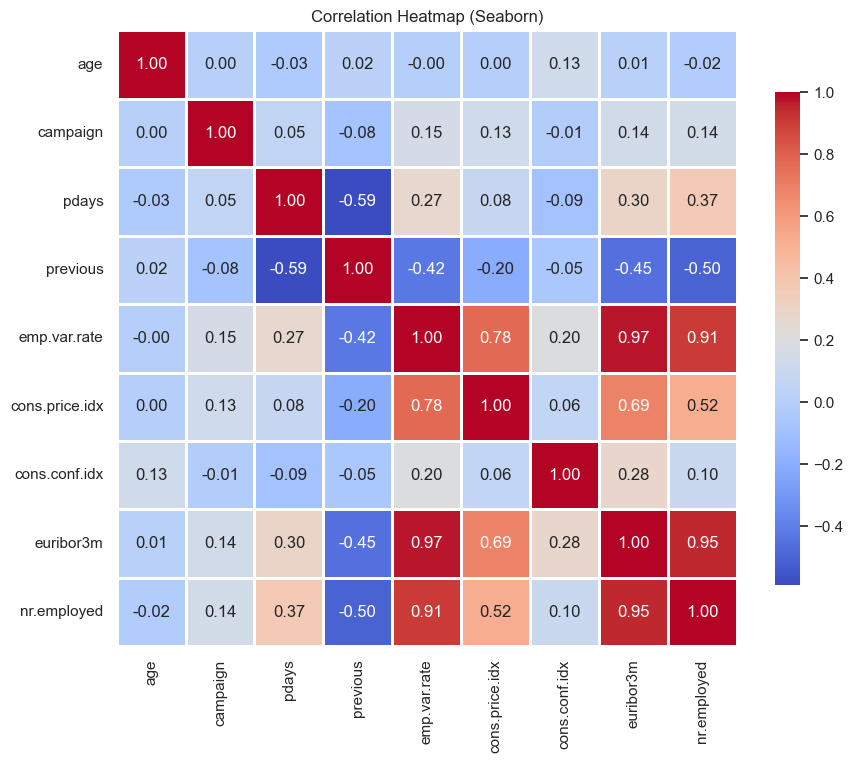

In [47]:
sns.set(style="white")  # clean background
plt.figure(figsize=(10,8))
sns.heatmap(
    Data_bank_full.select_dtypes(exclude='object').corr(), 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=1,
    linecolor='white', 
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Seaborn)")
plt.show()


Split the data in X and y, Make yes 1 and no 0, split in train and test.

In [48]:
#Split in X and y
# Make yes 1 and no 0
X = Data_bank_full.drop("y", axis='columns')
y = Data_bank_full["y"].replace(to_replace={'yes': '1', 'no': '0'}).astype(int)

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [50]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 41188 entries, 0 to 41187
Series name: y
Non-Null Count  Dtype
--------------  -----
41188 non-null  int64
dtypes: int64(1)
memory usage: 321.9 KB


In [51]:
# Split training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32950, 19) (8238, 19) (32950,) (8238,)


Make pipeline:
- pdays → two features:
- was_contacted = 0/1 (binary, passthrough)
- pdays_clean = actual days (NaN replaced by median, scaled)
- All other numeric columns: median imputation + scaling.
- All categorical columns: most frequent imputation + one-hot encoding.
- End-to-end pipeline: ready for X_test and predict().

In [52]:
# numerical and categorical columns
num_cols = ["age", "campaign", "pdays", "previous", "emp.var.rate", 
            "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
cat_cols = ["job", "marital", "education", "default", "housing", 
            "loan", "contact", "month", "day_of_week"]

# Transform pdays 
def simplify_pdays(X):
    X = X.copy()
    X['pdays'] = np.where(X['pdays'] == 999, 1, 0)  # 1 = not contacted, 0 = contacted
    return X

pdays_transformer = FunctionTransformer(simplify_pdays)

# Preprocessing
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),
    
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]), cat_cols)
])

# Full pipeline
full_pipeline = Pipeline([
    ("pdays_transform", pdays_transformer),
    ("preprocessing", preprocessor)
])

# Transform data
X_train_processed = full_pipeline.fit_transform(X_train)
X_test_processed = full_pipeline.transform(X_test)



Train models: Random Forest, KneighborsClassifier(n=5), KneighborsClassifier(n=100), Logistic Regression.

Approach
- Make preprocesser pipeline first (so you have to fit only once)
- Train models:
    . F1 score: good for imbalanced classes
    . ROC-AUC: good for probabilistically evaluating model quality
- Use cross validation to evaluate en maybe get better results


Make preprocesser pipeline first (so you have to fit only once)


In [56]:
# Split columns in categorical and numerical
num_features = ["age", "campaign", "pdays", "previous", "emp.var.rate", 
            "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
cat_features = ["job", "marital", "education", "default", "housing", 
            "loan", "contact", "month", "day_of_week"]

# pdays transformation
def transform_pdays(x):
    x = x.copy()
    # 999 means: client was NOT contacted
    # anything else: contacted
    return np.where(x == 999, 0, 1).reshape(-1, 1)

pdays_transformer = FunctionTransformer(transform_pdays)

# pipelines 
cat_pipeline = Pipeline([("onehot", OneHotEncoder(handle_unknown="ignore"))])

num_pipeline = Pipeline([
    ("pdays_transform", ColumnTransformer([
        ("pdays", pdays_transformer, ["pdays"]),
        ("other_nums", StandardScaler(), [c for c in num_features if c != "pdays"])
    ], remainder="drop"))
])
    
# Full preprocessing
preprocessor = ColumnTransformer([
    ("cat", cat_pipeline, cat_features),
    ("num", num_pipeline, num_features)
])

In [ ]:
Train all models:

In [57]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN (5)": KNeighborsClassifier(n_neighbors=5),
    "KNN (100)": KNeighborsClassifier(n_neighbors=100),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])

    # train on training set
    pipeline.fit(X_train, y_train)

    # predict on test set
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # evaluate
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"=== {name} ===")
    print(f"F1 : {f1:.3f}")
    print(f"AUC: {auc:.3f}")
    print()


=== Random Forest ===
F1 : 0.360
AUC: 0.761

=== KNN (5) ===
F1 : 0.358
AUC: 0.721

=== KNN (100) ===
F1 : 0.281
AUC: 0.776

=== Logistic Regression ===
F1 : 0.315
AUC: 0.780



Using 5-fold cross-validation:

In [63]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN (5)": KNeighborsClassifier(n_neighbors=5),
    "KNN (100)": KNeighborsClassifier(n_neighbors=100),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

scoring = {
    "f1": make_scorer(f1_score),
    "auc": "roc_auc"
}

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessing", preprocessor),
        ("model", model)
    ])
    
    # 5-fold cross-validation
    scores = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False
    )

    print(f"=== {name} ===")
    print(f"F1  : {scores['test_f1'].mean():.3f} ± {scores['test_f1'].std():.3f}")
    print(f"AUC : {scores['test_auc'].mean():.3f} ± {scores['test_auc'].std():.3f}")
    print()


=== Random Forest ===
F1  : 0.386 ± 0.014
AUC : 0.774 ± 0.009

=== KNN (5) ===
F1  : 0.341 ± 0.011
AUC : 0.728 ± 0.010

=== KNN (100) ===
F1  : 0.309 ± 0.014
AUC : 0.782 ± 0.006

=== Logistic Regression ===
F1  : 0.347 ± 0.009
AUC : 0.794 ± 0.011



Conclusion:

F1 Score (balance between precision and recall)
- Random Forest: 0.386 ± 0.014 → Best F1 among your models, but still moderate
- KNN (5): 0.341 ± 0.011 → slightly lower
- KNN (100): 0.309 ± 0.014 → drops a lot, likely because using too many neighbors smooths the predictions
- Logistic Regression: 0.347 ± 0.009 → in between

F1 is influenced by class imbalance. Random Forest seems slightly better at capturing the minority class.

ROC-AUC (ability to rank positive vs negative)
- Random Forest: 0.774 ± 0.009 → good, but not perfect
- KNN (5): 0.728 ± 0.010 → worst among the four
- KNN (100): 0.782 ± 0.006 → interestingly high, KNN with many neighbors gives smoother probabilities
- Logistic Regression: 0.794 ± 0.011 → best AUC, meaning it ranks positives vs negatives well

Logistic Regression gives the best probability separation (AUC), while Random Forest gives better discrete predictions (F1).

Random Forest: better for actual predictions (F1)

Logistic Regression: better for ranking/probabilities (AUC)

KNN: performs very sensitive to n_neighbors; small k favors F1, large k favors AUC

Now use some grid search:

Random forest:
- model__n_estimators:
    > Number of trees in the forest: Trying 100 or 300 trees

- model__max_depth:
    > Maximum depth of each tree

- model__min_samples_split:
    > Minimum number of samples required to split a node

KNN:
- model__n_neighbors
    > The number of nearest neighbors KNN uses to make a prediction.

- model__weights
    > How each neighbor contributes to the prediction.
    > Options: "uniform" → every neighbor has equal weight. "distance" → closer neighbors count more than farther ones (inverse distance weighting).

Logistic regression:
- Model_C: 
    > Controls how simple or flexible the model is and helps to prevent overfitting by penalizing large coefficients
    > 0.01 =  strong regularization and simpler model /  10 = weak regularization and model fits the data more closely)

- Model_penalty:
    Controls the type of regularization to use Options in scikit-learn:
    > "l1" → Lasso (encourages sparsity, can set some coefficients to 0)
    > "l2" → Ridge (shrinks coefficients but keeps them all)
    > "elasticnet" → combination of L1 + L2
    I chose "l2" → standard Ridge regularization, most common for Logistic Regression

- Model_solver:
    > the algorithm to optimize the model:
    > I chose "lbfgs" → recommended for L2 penalty and standard datasets


In [67]:
# Random Forest pipeline + grid
pipeline_rf = Pipeline([
    ("preprocessing", preprocessor),
    ("model", RandomForestClassifier(random_state=42))
])
param_grid_rf = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5, 10]
}

# KNN pipeline + grid
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor),
    ("model", KNeighborsClassifier())
])
param_grid_knn = {
    "model__n_neighbors": [5, 20, 100],
    "model__weights": ["uniform", "distance"]
}

# Logistic Regression pipeline + grid
pipeline_lr = Pipeline([
    ("preprocessing", preprocessor),
    ("model", LogisticRegression(max_iter=2000))
])
param_grid_lr = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs"]
}



Evaluate grid Search with F1 + AUC

In [70]:
# Common settings F1
scoring = "f1"  # primary metric to optimize
cv_folds = 5
n_jobs = -1

grids = {
    "Random Forest": (pipeline_rf, param_grid_rf),
    "KNN": (pipeline_knn, param_grid_knn),
    "Logistic Regression": (pipeline_lr, param_grid_lr)
}

best_models = {}

for name, (pipeline, param_grid) in grids.items():
    
    # Grid search optimizing F1
    grid = GridSearchCV(
        pipeline,
        param_grid,
        cv=cv_folds,
        scoring=scoring,
        n_jobs=n_jobs
    )
    
    grid.fit(X_train, y_train)
    
    # Save best model
    best_models[name] = grid.best_estimator_
    
    # Compute AUC using cross-validation on the best estimator
    auc_scores = cross_val_score(
        best_models[name],
        X_train, y_train,
        cv=cv_folds,
        scoring="roc_auc",
        n_jobs=n_jobs
    )
    
    print(f"=== {name} ===")
    print("Best parameters:", grid.best_params_)
    print(f"Best F1 (CV): {grid.best_score_:.3f}")
    print(f"AUC (CV mean): {auc_scores.mean():.3f} ± {auc_scores.std():.3f}")
    print()


=== Random Forest ===
Best parameters: {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 300}
Best F1 (CV): 0.390
AUC (CV mean): 0.790 ± 0.007

=== KNN ===
Best parameters: {'model__n_neighbors': 20, 'model__weights': 'distance'}
Best F1 (CV): 0.350
AUC (CV mean): 0.758 ± 0.007

=== Logistic Regression ===
Best parameters: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best F1 (CV): 0.347
AUC (CV mean): 0.794 ± 0.011



Visualize the ROC and AUC

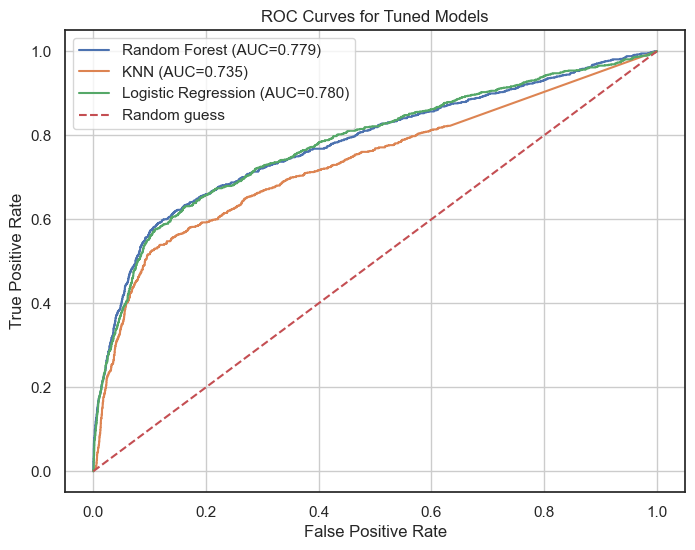

In [72]:
plt.figure(figsize=(8,6))

for name, model in best_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1], '--', label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Tuned Models")
plt.legend()
plt.grid(True)
plt.show()


In [73]:
# Evaluate tuned models on the TEST SET
results = []

for name, model in best_models.items():
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Save
    results.append({
        "Model": name,
        "F1 (test)": f1,
        "AUC (test)": auc
    })

# Convert to table
results_df = pd.DataFrame(results)
print(results_df)


                 Model  F1 (test)  AUC (test)
0        Random Forest   0.364576    0.779479
1                  KNN   0.324047    0.734695
2  Logistic Regression   0.316800    0.780025


Add Lift calculation function: Lift tells you how much better your model is than random guessing at finding positive cases.

In [75]:
def compute_lift(y_true, y_prob, bins=10):
    data = pd.DataFrame({'y': y_true, 'prob': y_prob})
    data = data.sort_values('prob', ascending=False)

    data['bucket'] = pd.qcut(data['prob'], bins, labels=False, duplicates='drop')

    # Reverse so bucket 0 = highest scores
    data['bucket'] = (data['bucket'].max() - data['bucket'])

    lift_table = data.groupby('bucket').agg(
        total=('y', 'count'),
        positive=('y', 'sum')
    ).reset_index()

    lift_table['cum_positive'] = lift_table['positive'].cumsum()
    lift_table['cum_total'] = lift_table['total'].cumsum()

    # cumulative gain (how many % of positives found)
    lift_table['gain'] = lift_table['cum_positive'] / lift_table['positive'].sum()

    # lift = gain / random_baseline
    lift_table['lift'] = lift_table['gain'] / ((lift_table['bucket'] + 1) / bins)

    return lift_table


In [76]:
def plot_lift_curve(lift_table, model_name):
    plt.figure(figsize=(7,5))
    plt.plot(lift_table['bucket'], lift_table['lift'], marker='o')
    plt.axhline(1.0, color='gray', linestyle='--', label="Random Model")
    plt.title(f"Lift Curve – {model_name}")
    plt.xlabel("Bucket (0 = top scores)")
    plt.ylabel("Lift")
    plt.grid(True)
    plt.legend()
    plt.show()


=== Random Forest Lift Table ===
   bucket  total  positive  cum_positive  cum_total      gain      lift
0       0    824       411           411        824  0.439572  4.395722
1       1    824       168           579       1648  0.619251  3.096257
2       2    824        64           643       2472  0.687701  2.292335
3       3    823        56           699       3295  0.747594  1.868984
4       4    824        46           745       4119  0.796791  1.593583
5       5    824        47           792       4943  0.847059  1.411765
6       6    823        37           829       5766  0.886631  1.266616
7       7    824        37           866       6590  0.926203  1.157754
8       8    824        40           906       7414  0.968984  1.076649
9       9    824        29           935       8238  1.000000  1.000000


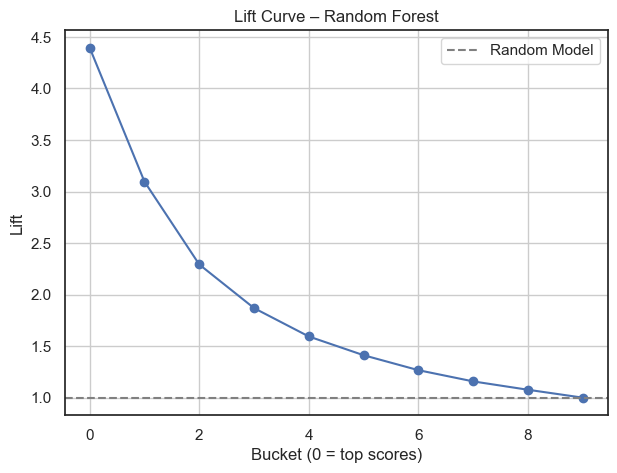


=== KNN Lift Table ===
   bucket  total  positive  cum_positive  cum_total      gain      lift
0       0    824       377           377        824  0.403209  4.032086
1       1    824       151           528       1648  0.564706  2.823529
2       2    824        63           591       2472  0.632086  2.106952
3       3    823        66           657       3295  0.702674  1.756684
4       4    824        49           706       4119  0.755080  1.510160
5       5    824        43           749       4943  0.801070  1.335116
6       6   3295       186           935       8238  1.000000  1.428571


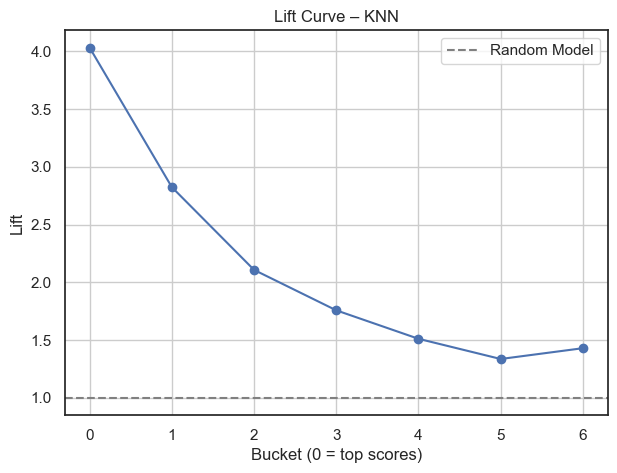


=== Logistic Regression Lift Table ===
   bucket  total  positive  cum_positive  cum_total      gain      lift
0       0    824       382           382        824  0.408556  4.085561
1       1    824       188           570       1648  0.609626  3.048128
2       2    824        69           639       2472  0.683422  2.278075
3       3    823        62           701       3295  0.749733  1.874332
4       4    824        57           758       4119  0.810695  1.621390
5       5    824        39           797       4943  0.852406  1.420677
6       6    823        41           838       5766  0.896257  1.280367
7       7    824        32           870       6590  0.930481  1.163102
8       8    824        30           900       7414  0.962567  1.069519
9       9    824        35           935       8238  1.000000  1.000000


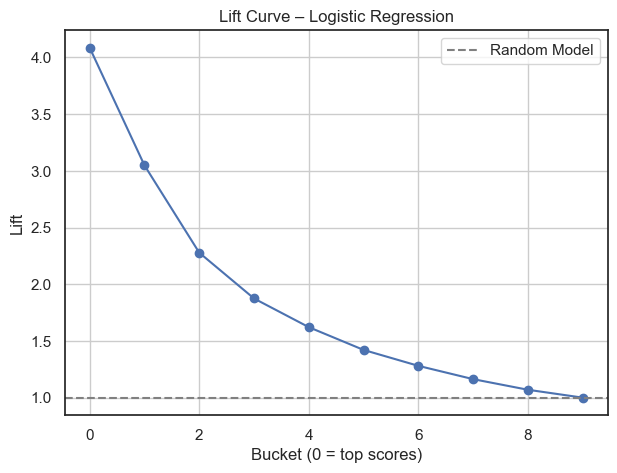

In [77]:
for name, model in best_models.items():
    y_prob = model.predict_proba(X_test)[:, 1]

    lift_table = compute_lift(y_test, y_prob, bins=10)

    print(f"\n=== {name} Lift Table ===")
    print(lift_table)

    plot_lift_curve(lift_table, name)

Interpretation:

Lift > 1: model is better than random

Lift = 1: same as random

Higher lift at the top buckets: better targeting, model is good at finding the most important positives

Flat line: model behaves like random

Random forrest has the highest lift score in the top bucket. 
